In [ ]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [2]:
%%javascript
IPython.notebook.clear_all_output();

<IPython.core.display.Javascript object>

In [3]:
import sys
import tensorflow as tf
import tensorflow.keras as keras
print("Python version %s.%s.%s" % sys.version_info[:3])
print("Tensorflow version %s" % tf.__version__)
print("Keras version %s" % keras.__version__)

Python version 3.9.7
Tensorflow version 2.8.0
Keras version 2.8.0


Import data from csv file 

In [4]:
import pandas as pd
labels = pd.read_csv('CSV Filenames DL SP22.csv')
labels.head()

,FILENAME,AGE
0,1_0_0_20161219140623097.jpg.chip.jpg,1
1,1_0_0_20161219140627985.jpg.chip.jpg,1
2,1_0_0_20161219140642920.jpg.chip.jpg,1
3,1_0_0_20161219154018476.jpg.chip.jpg,1
4,1_0_0_20161219154556757.jpg.chip.jpg,1


In [5]:
labels

,FILENAME,AGE
0,1_0_0_20161219140623097.jpg.chip.jpg,1
1,1_0_0_20161219140627985.jpg.chip.jpg,1
2,1_0_0_20161219140642920.jpg.chip.jpg,1
3,1_0_0_20161219154018476.jpg.chip.jpg,1
4,1_0_0_20161219154556757.jpg.chip.jpg,1
...,...,...
9775,100_1_0_20170110183726390.jpg.chip.jpg,100
9776,100_1_2_20170105174847679.jpg.chip.jpg,100
9777,101_1_2_20170105174739309.jpg.chip.jpg,101
9778,110_1_1_20170110155201038.jpg.chip.jpg,110


In [6]:
label_1 = "%s - %s" %((labels["AGE"][0]) , (labels["AGE"][1870]))
label_2 = "%s - %s" %((labels["AGE"][1871]) , (labels["AGE"][2786]))
label_3 = "%s - %s" %((labels["AGE"][2787]) , (labels["AGE"][3821]))
label_4 = "%s - %s" %((labels["AGE"][3822]) , (labels["AGE"][4980]))
label_5 = "%s - %s" %((labels["AGE"][4981]) , (labels["AGE"][6027]))
label_6 = "%s - %s" %((labels["AGE"][6027]) , (labels["AGE"][6939]))
label_7 = "%s - %s" %((labels["AGE"][6939]) , (labels["AGE"][7980]))
label_8 = "%s - %s" %((labels["AGE"][7980]) , (labels["AGE"][8833]))
label_9 = "%s - %s" %((labels["AGE"][8834]) , (labels["AGE"][9779]))

total_labels = [label_1,
                label_2,
                label_3,
                label_4,
                label_5,
                label_6,
                label_7,
                label_8,
                label_9]

total_labels

['1 - 3',
 '4 - 8',
 '9 - 16',
 '17 - 25',
 '26 - 32',
 '32 - 42',
 '42 - 55',
 '55 - 66',
 '67 - 110']

Code for the extracting the image and perform it to the numpy array

In [7]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
#import os
#print(os.getcwd())
img_width = 224

def get_image(filename):
    ########################################################################
    # TODO: Your code here...
    original = load_img(filename, target_size=(224, 224))
    #print(original.size)
    
    numpy_image = img_to_array(original)
    #print(numpy_image.shape)
    return numpy_image
    ########################################################################

testing the image

(224, 224, 3)


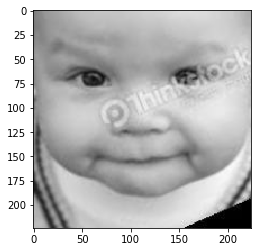

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

image = get_image('preprocessed/preprocessed/Greyscale/%s' % labels['FILENAME'][0])
print(image.shape)
plt.imshow(np.uint8(image))
plt.show()

In [9]:
num_train_images = 9780 
split_point = 7000
num_classes = 9
arr = [i for i in range(num_classes)]
arr

[0, 1, 2, 3, 4, 5, 6, 7, 8]

function to perform labels from csv file

In [10]:
def assign_num(num):
    if (1 <= num <= 3):
        return 0
    if (4 <= num <= 8):
        return 1
    if (9 <= num <= 16):
        return 2
    if (17 <= num <= 25):
        return 3
    if (26 <= num <= 32):
        return 4
    if (33 <= num <= 42):
        return 5
    if (43 <= num <= 55):
        return 6
    if (56 <= num <= 66):
        return 7
    if (67 <= num <= 110):
        return 8

In [11]:
assign_num(labels["AGE"][9779])

8

In [12]:
x = np.zeros((num_train_images, img_width, img_width, 3), dtype=np.uint8)
y = np.zeros((num_train_images, num_classes), dtype=np.uint8)



count = 0

for i in range(num_train_images):
    x[i] = get_image('preprocessed/preprocessed/Greyscale/%s' % labels['FILENAME'][i])
    y[i][assign_num(labels["AGE"][i])] = 1
    count += 1
    if(count % 1000 == 0): print(count, 'images loaded')

1000 images loaded
2000 images loaded
3000 images loaded
4000 images loaded
5000 images loaded
6000 images loaded
7000 images loaded
8000 images loaded
9000 images loaded


In [13]:
num = 9778
print("orig : %d" % labels["AGE"][num])
print(y[num])

orig : 110
[0 0 0 0 0 0 0 0 1]


In [14]:
y.shape

(9780, 9)

In [15]:
x.shape

(9780, 224, 224, 3)

In [16]:
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.applications import vgg16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.resnet50 import preprocess_input as preprocess_input_resnet50
from sklearn.model_selection import train_test_split

In [17]:
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [18]:
from tensorflow.keras.models import Model
from tensorflow.keras.applications import resnet50
vgg16_model = vgg16.VGG16(weights='imagenet', include_top=True)
resnet50 = resnet50.ResNet50(weights='imagenet', include_top=True)
new_resnet50 = Model(inputs = resnet50.input, outputs = resnet50.get_layer('avg_pool').output)
new_vgg16 = Model(inputs = vgg16_model.input, outputs = vgg16_model.get_layer('fc2').output)
new_resnet50.summary()
new_vgg16.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

                                                                 
 block5_conv1 (Conv2D)       (None, 14, 14, 512)       2359808   
                                                                 
 block5_conv2 (Conv2D)       (None, 14, 14, 512)       2359808   
                                                                 
 block5_conv3 (Conv2D)       (None, 14, 14, 512)       2359808   
                                                                 
 block5_pool (MaxPooling2D)  (None, 7, 7, 512)         0         
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 fc1 (Dense)                 (None, 4096)              102764544 
                                                                 
 fc2 (Dense)                 (None, 4096)              16781312  
                                                                 
Total para

In [19]:
x_resnet50 = preprocess_input_resnet50(x)
x_vgg16 = preprocess_input(x)
resnet_predictions = new_resnet50.predict(x_resnet50, batch_size=16, verbose=1)
vgg16_predictions = new_vgg16.predict(x_vgg16, batch_size=16, verbose=1)

612/612 [==============================] - 1118s 2s/step


In [20]:
resnet_predictions.shape

(9780, 2048)

In [21]:
import keras.backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

combined_features = np.concatenate([resnet_predictions, vgg16_predictions],axis=1)

In [105]:
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalAveragePooling2D, Dropout, Activation, BatchNormalization

combined_inputs = Input(shape = (6144))
x = Dropout(0.5)(combined_inputs) 
x = BatchNormalization()(x)
x = Dense(256, use_bias=False)(x) 
# x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Dropout(0.5)(x) 

new_predictions = Dense(num_classes, use_bias=False, activation='softmax')(x) 

In [106]:
from tensorflow.keras.models import Model
model = Model(inputs=combined_inputs, outputs=new_predictions) # specify what is network input, and what is network output
model.summary()
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy', f1_m])

Model: "model_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_23 (InputLayer)       [(None, 6144)]            0         
                                                                 
 dropout_40 (Dropout)        (None, 6144)              0         
                                                                 
 batch_normalization_20 (Bat  (None, 6144)             24576     
 chNormalization)                                                
                                                                 
 dense_40 (Dense)            (None, 256)               1572864   
                                                                 
 activation_20 (Activation)  (None, 256)               0         
                                                                 
 dropout_41 (Dropout)        (None, 256)               0         
                                                          

In [107]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss',  patience=3, verbose=1)

X_train, X_test, y_train, y_test = train_test_split(combined_features, y, test_size=0.1, random_state=42)

In [108]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

model.fit(X_train, y_train, batch_size=128, epochs=30, validation_split=0.1, validation_data=(X_test, y_test), callbacks=[early_stop], verbose=1)

Epoch 1/30
62/62 [==============================] - 30s 411ms/step - loss: 1.9907 - accuracy: 0.4039 - f1_m: 0.3883 - val_loss: 1.3682 - val_accuracy: 0.4881 - val_f1_m: 0.4301
Epoch 2/30
62/62 [==============================] - 24s 388ms/step - loss: 1.3889 - accuracy: 0.5020 - f1_m: 0.4648 - val_loss: 1.2417 - val_accuracy: 0.5062 - val_f1_m: 0.3902
Epoch 3/30
62/62 [==============================] - 25s 417ms/step - loss: 1.1850 - accuracy: 0.5449 - f1_m: 0.5046 - val_loss: 1.1963 - val_accuracy: 0.5301 - val_f1_m: 0.3874
Epoch 4/30
62/62 [==============================] - 23s 380ms/step - loss: 1.0823 - accuracy: 0.5850 - f1_m: 0.5430 - val_loss: 1.1598 - val_accuracy: 0.5505 - val_f1_m: 0.4167
Epoch 5/30
62/62 [==============================] - 19s 313ms/step - loss: 1.0375 - accuracy: 0.6045 - f1_m: 0.5602 - val_loss: 1.1508 - val_accuracy: 0.5471 - val_f1_m: 0.4340
Epoch 6/30
62/62 [==============================] - 22s 358ms/step - loss: 0.9732 - accuracy: 0.6200 - f1_m: 0.5862

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
labels = ["0", "1", "2", "3", "4", "5", "6", "7", "8"]

cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
resnet_input = Input(shape = (2048))
x = Dropout(0.5)(resnet_input) 
x = BatchNormalization()(x)
x = Dense(512, use_bias=False)(x) 
# x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Dropout(0.5)(x) 

new_predictions = Dense(num_classes, use_bias=False, activation='softmax')(x) 

model = Model(inputs=resnet_input, outputs=new_predictions)

early_stop = EarlyStopping(monitor='val_loss',  patience=4, verbose=1)

X_train, X_test, y_train, y_test = train_test_split(resnet_predictions, y, test_size=0.1, random_state=42, shuffle=True)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', f1_m])
model.fit(X_train, y_train, batch_size=128, epochs=30, validation_split=0.1, validation_data=(X_test, y_test), callbacks=[early_stop], verbose=1)